#  Number recognition on MNIST dataset using keras.Sequential model and layers and Adam optimizer with high accuracy.

## Load Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

## Load training data

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


### Looking into the Training dataset 

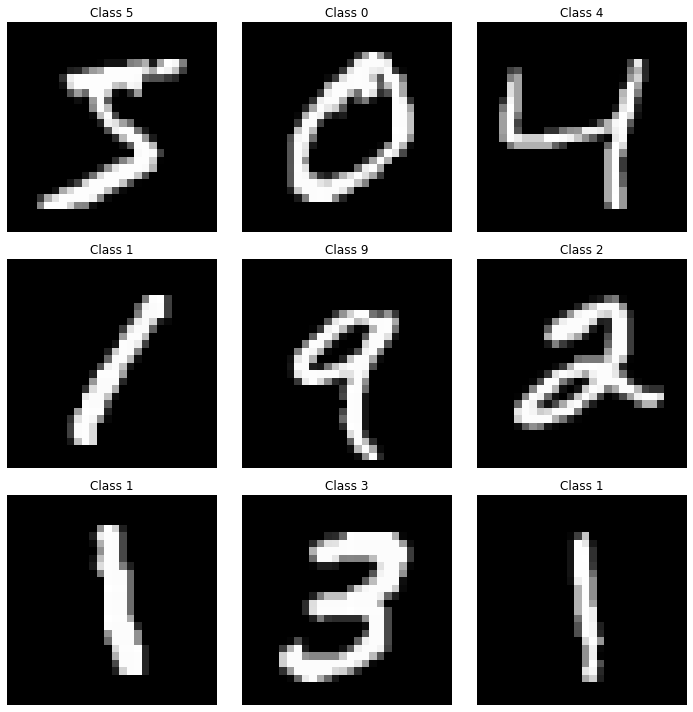

In [4]:
rows, cols = 3, 3

plt.figure(figsize=(10, 10))

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.axis('off')  

plt.tight_layout()  
plt.show()

## Format the data for training


In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build the neural network


In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                         
model.add(Dropout(0.2))   # Dropout helps protect the model from "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) 

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

Epoch 1/4
469/469 [==============================] - 9s 17ms/step - loss: 0.2501 - accuracy: 0.9241 - val_loss: 0.1072 - val_accuracy: 0.9672
Epoch 2/4
469/469 [==============================] - 7s 16ms/step - loss: 0.0997 - accuracy: 0.9694 - val_loss: 0.0787 - val_accuracy: 0.9751
Epoch 3/4
469/469 [==============================] - 7s 16ms/step - loss: 0.0693 - accuracy: 0.9779 - val_loss: 0.0671 - val_accuracy: 0.9791
Epoch 4/4
469/469 [==============================] - 7s 16ms/step - loss: 0.0562 - accuracy: 0.9820 - val_loss: 0.0635 - val_accuracy: 0.9802


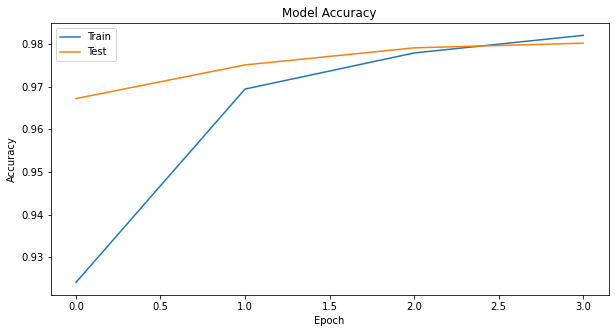

In [9]:

history = model.fit(X_train, Y_train, batch_size=128, epochs=4, verbose=1, validation_data=(X_test, Y_test))

plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## The performance

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06350197643041611
Test accuracy: 0.9801999926567078


<AxesSubplot:>

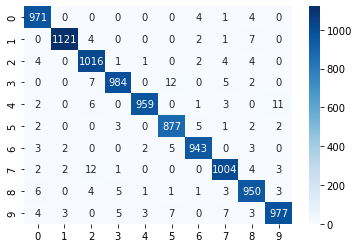

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_mtx = confusion_matrix(y_test, predicted_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')


In [11]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Check items we get right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


313/313 [==============================] - 1s 4ms/step


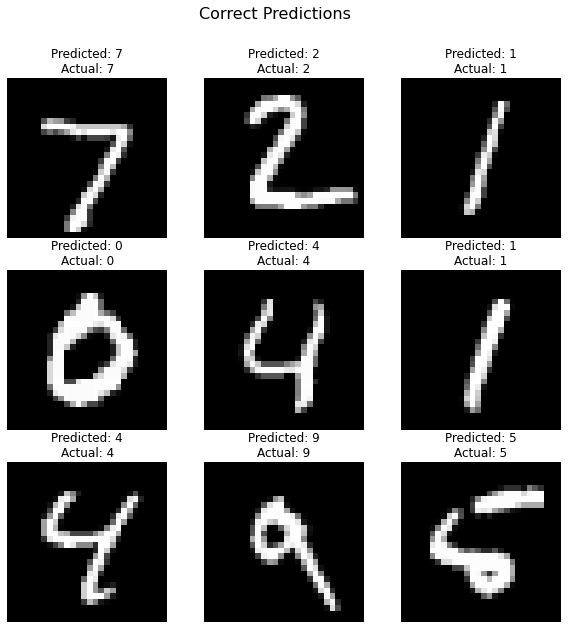

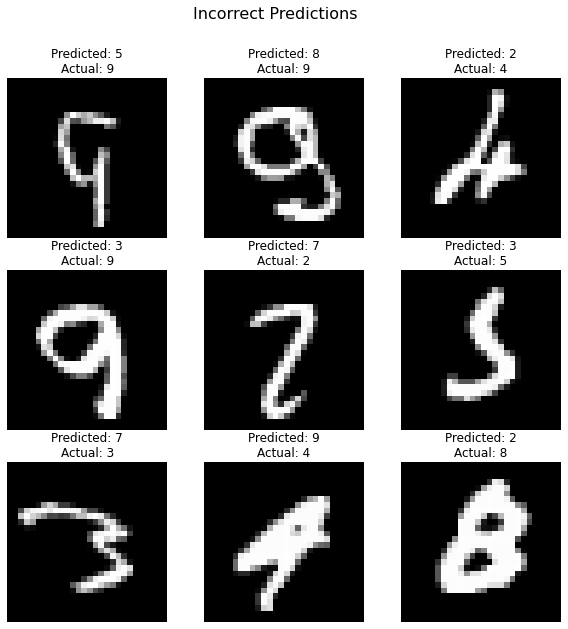

In [12]:
plt.figure(figsize=(10, 10))

# For correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}\nActual: {}".format(predicted_classes[correct], y_test[correct]))
    plt.axis('off')
plt.suptitle('Correct Predictions', fontsize=16)
plt.show()

# for incorrect predictions
plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}\nActual: {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis('off')
plt.suptitle('Incorrect Predictions', fontsize=16)
plt.show()
